In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt

params = {
    "V_th":      -54.0,   #mV
    "V_reset":   -80.0,    #mV
    "tau_m" :   10.0,      #ms
}

t_start = 0.0    #ms
t_end = 1000.0    #ms
dt = 0.1              #ms

time_points = np.arange(t_start, t_end + dt, dt)


In [104]:
def lif_noisy_model(tau_m, Vth, V_reset, sigma_V,
                       time_points, dt, generate_spikes=True):

    n_steps = len(time_points)
    voltage = np.zeros(n_steps)
    voltage[0] = -56.0
    spike_times = []
    noise_factor = sigma_V * math.sqrt((2.0 * tau_m) / dt)
    
    threshold = Vth
    if not generate_spikes:
        threshold= 1e5

    for i in range(len(time_points) - 1):
        random_val = np.random.randn()
        e_total = -56.0 + noise_factor * random_val
        dV_dt = (-voltage[i] + e_total) / tau_m    #change in V 
        
        # update V
        voltage[i+1] = voltage[i] + dV_dt * dt
        
        if generate_spikes and voltage[i+1] >= threshold:
            voltage[i+1] = V_reset     ##reset after a spike
            spike_times.append(time_points[i+1])
        
    
    return time_points, voltage, spike_times

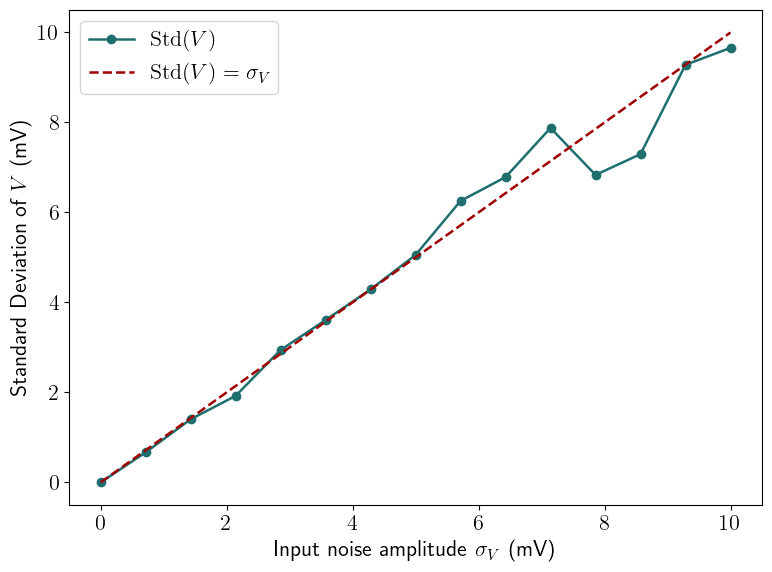

In [ ]:
sigma_v_values = np.linspace(0, 10, 15)
std_v = []

for sigma in sigma_v_values:
    time_points_sim, voltage_sim, spike_times = lif_noisy_model(
        params["tau_m"], params["V_th"], params["V_reset"], sigma,
        time_points, dt, generate_spikes=False
    )
    
    std_dev = np.std(voltage_sim)
    std_v.append(std_dev)
    

### sigma/noise vs standard deviation of V 

plt.rcParams.update({"font.size":16, "text.usetex":True, "figure.figsize":(8, 6)})
plt.figure(figsize=(8, 6))
plt.plot(sigma_v_values, std_v, marker='o', linestyle='-', color='#1f6f6f', linewidth=1.8, label=r'$\mathrm{Std}(V)$')
plt.plot(sigma_v_values, sigma_v_values, linestyle='--',  color='#a00000',  linewidth=1.8, label=r'$\mathrm{Std}(V) = \sigma_V$')
plt.xlabel('Input noise amplitude $\sigma_V$ (mV)')
plt.ylabel('Standard Deviation of $V$ (mV)')
plt.tight_layout()
plt.legend()
plt.savefig('2_std_sigma__1.png', dpi=300)
plt.show()







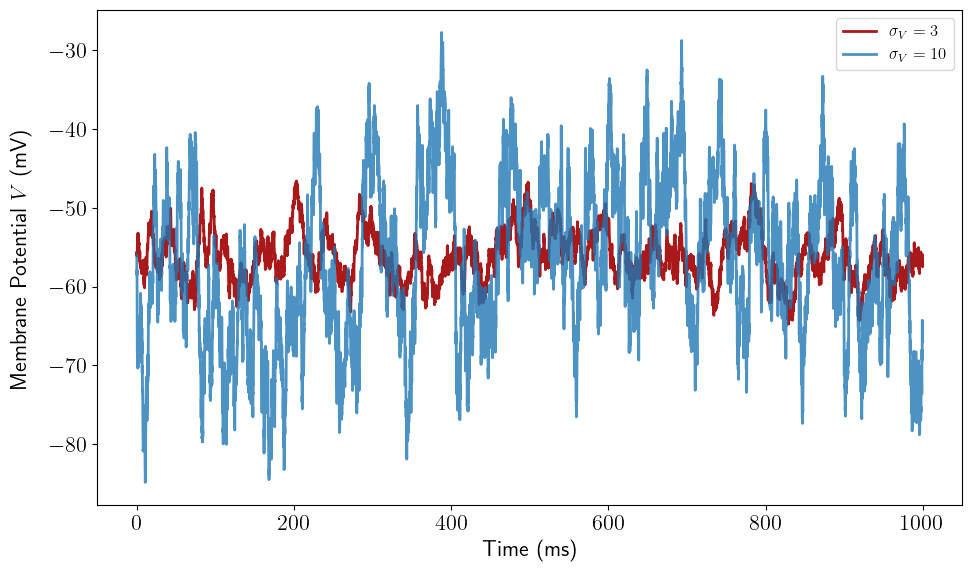

In [106]:
## voltage fluctuations for different sigma/noise scales 

time_points_sim, voltage_trace_sigma3, spike_times = lif_noisy_model(
        params["tau_m"], params["V_th"], params["V_reset"], sigma_V=3.0 ,
        time_points=time_points, dt=dt, generate_spikes=False)
      
time_points_sim, voltage_trace_sigma10, spike_times = lif_noisy_model(
        params["tau_m"], params["V_th"], params["V_reset"], sigma_V=10.0 ,
        time_points=time_points, dt=dt, generate_spikes=False)


plt.rcParams.update({"font.size":16, "text.usetex":True, "figure.figsize":(12, 8)})


plt.figure(figsize=(10, 6))
plt.plot(time_points_sim, voltage_trace_sigma3, label=r'$\sigma_V = 3$', color='#a00000', linewidth=2, alpha=0.9)
plt.plot(time_points_sim, voltage_trace_sigma10, label=r'$\sigma_V = 10$',  color='C0', linewidth=2, alpha=0.8)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Membrane Potential $V$ (mV)', fontsize=16, labelpad=12)
plt.legend(fontsize=12)
plt.tight_layout() 
plt.savefig('2_noise_amplitudes.png', dpi=300)
plt.show()

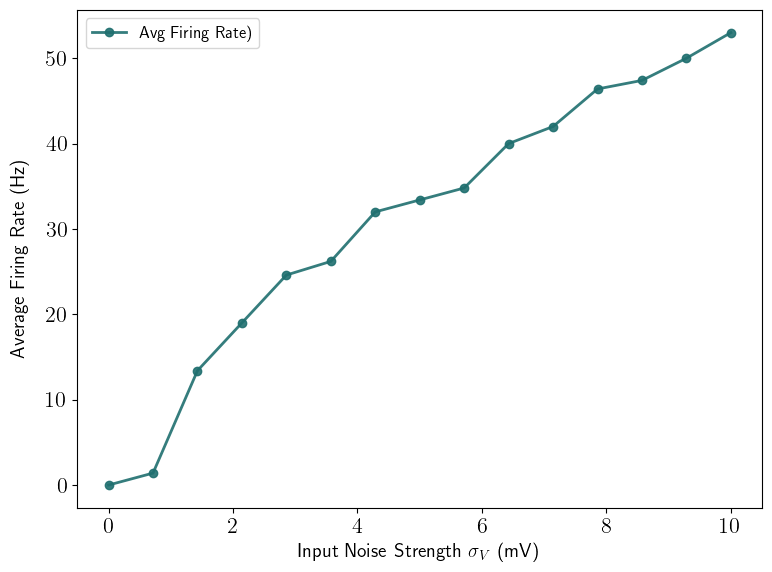

In [116]:
t_start_2 = 0.0       #ms
t_end_2 = 5000.0   #ms 
dt = 0.1         #ms

time_points_2 = np.arange(t_start_2, t_end_2 + dt, dt)
n_steps = len((time_points))

sigma_v_values = np.linspace(0, 10, 15)
firing_rates= []
simulation_duration = t_end_2 / 1000.0      #convert to seconds

for sigma in sigma_v_values:
    time_points_sim, voltage_sim_2, spike_times_2 = lif_noisy_model(
        params["tau_m"], params["V_th"], params["V_reset"], sigma,
        time_points_2, dt, generate_spikes=True
    )
    
    num_spikes = len(spike_times_2)
    rate = num_spikes / simulation_duration
    firing_rates.append(rate) 

plt.figure(figsize=(8, 6))
plt.plot(sigma_v_values, firing_rates, 'o-', color='#1f6f6f', linewidth=2, alpha=0.9, label='Avg Firing Rate)')
plt.xlabel('Input Noise Strength $\sigma_V$ (mV)', fontsize=14)
plt.ylabel('Average Firing Rate (Hz)', fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('2_firing_rate_noise_correlation.png', dpi=300)
plt.show()
